<a href="https://colab.research.google.com/github/08Arno30/COS711-A2/blob/main/src/u21457451_COS711_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS711-A2

## Introduction

This project involves developing a neural network (NN) to classify almonds into three different types based on numeric features extracted from their images. The dataset contains a variety of almond samples, with the purpose of accurately categorising them using machine learning techniques. To accomplish this, the following steps are necessary:

1. **Data Preprocessing**: Clean and prepare the dataset for optimal results during training.
2. **Hyperparameter Optimisation**: Fine-tune the neural network's hyperparameters to improve classification accuracy.
3. **A Comparative Study of Gradient-Based Algorithms**: Evaluate the performance of several gradient-based optimisation strategies to determine the most effective strategy for training the NN.
4. **Hybrid Training Algorithm**: Create a new algorithm that uses gradient information from other optimisation approaches to increase convergence and performance.

The project's goal with these steps is to develop a strong classification model while also investigating advanced training approaches.

# Setup

1. Create a folder on Google Drive
2. Mount your drive using the code below.
3. Change `working_directory` to contain the path for the folder created in step 1.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change working directory
working_directory = "/content/drive/MyDrive/Honours/Semester\ 2/COS711/Assignments/COS711-A2"
%cd $working_directory

/content/drive/MyDrive/Honours/Semester 2/COS711/Assignments/COS711-A2


# Installments
Install necessary packages.

# Imports
Import necessary packages.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
from scipy.stats import zscore, iqr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import copy
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, TensorDataset

# Data Pre-processing

In [4]:
# Load the data
data = pd.read_csv("./data/Almond.csv")
df = pd.DataFrame(data)

In [5]:
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [8]:
# Displaying the data types
print(f'Data types:\n{df.dtypes}\n')

# Displaying missing values
print(f'Missing values:\n{df.isnull().sum()}\n')

Data types:
Length (major axis)         float64
Width (minor axis)          float64
Thickness (depth)           float64
Area                        float64
Perimeter                   float64
Roundness                   float64
Solidity                    float64
Compactness                 float64
Aspect Ratio                float64
Eccentricity                float64
Extent                      float64
Convex hull(convex area)    float64
Type                         object
dtype: object

Missing values:
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64



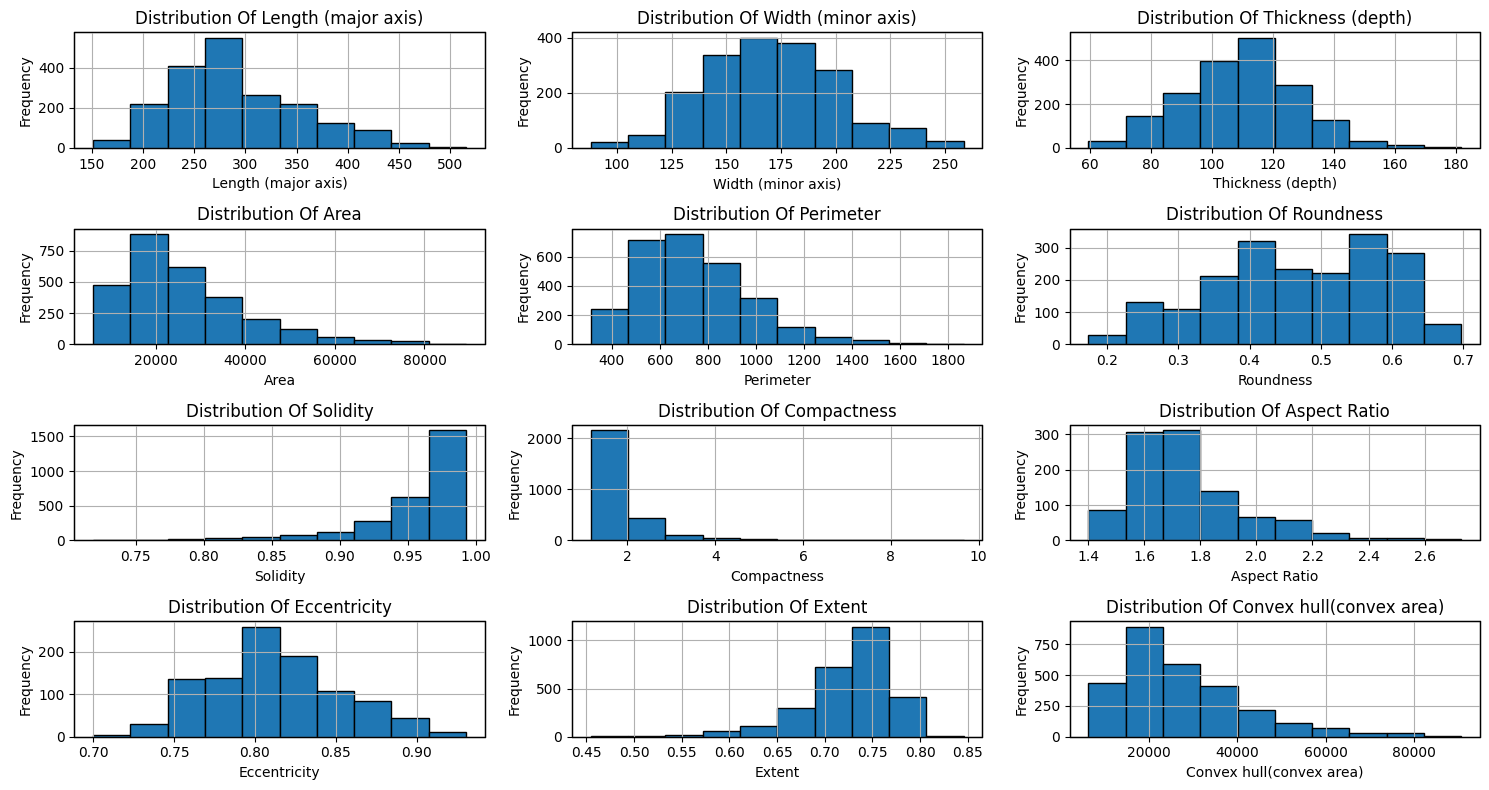

In [9]:
# View distributions for features
def visualise_distributions(df):
  if 'Type' in df.columns:
    features = df.drop(columns=['Type'])
  else:
    features = df

  # Number of features
  num_features = len(features.columns)

  # Determine grid size for subplots
  n_rows = (num_features + 2) // 3

  # Create a figure and a grid of subplots
  fig, axes = plt.subplots(n_rows, 3, figsize=(15, 8))
  axes = axes.flatten()

  # Plot each feature in a subplot
  for i, col in enumerate(features.columns):
      axes[i].hist(features[col], edgecolor='black')
      initial_col = col

      axes[i].set_title(f'Distribution Of {col}')

      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Frequency')
      axes[i].grid()
      axes[i].patch.set_edgecolor('black')
      axes[i].patch.set_linewidth(1)

  # Remove any empty subplots
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  # Adjust layout
  plt.tight_layout()
  plt.show()

visualise_distributions(df)

In [10]:
len(df['Width (minor axis)'].isnull())

2803

In [11]:
len(df['Length (major axis)'].isnull())

2803

In [12]:
len(df[df['Length (major axis)'].isnull() & df['Width (minor axis)'].isnull()])

0

Notice that `Length (major axis)` and `Width (minor axis)` will never have the case where both are missing. Hence, when we impute one, we can immediately get their `Aspect Ratio` and `Eccentricity`.

In [13]:
len(df[df['Length (major axis)'].isnull() & df['Aspect Ratio'].isnull() & df['Eccentricity'].isnull()])

857

In [14]:
len(df[df['Width (minor axis)'].isnull() & df['Aspect Ratio'].isnull() & df['Eccentricity'].isnull()])

942

#### Analysis:

From the analysis above we can clearly see that both `Aspect ratio` and `Eccentricity` have missing values when either `Width (minor axis)` or `Length (major axis)` have missing values. Hence, we cannot make use of the formulas for `Aspect Ratio` or `Eccentricity` to find the actual values for those missing values.

Based on the distributions of the columns that contain missing values, most have a normal/near-normal distribution. We can therefore make use of mean imputation to handle missing values in those features. However, the distributions for `Length (major axis)` and `Aspect Ratio` are skewed to the right. Hence, we will make use of median imputation for those features.

# Handle Outliers

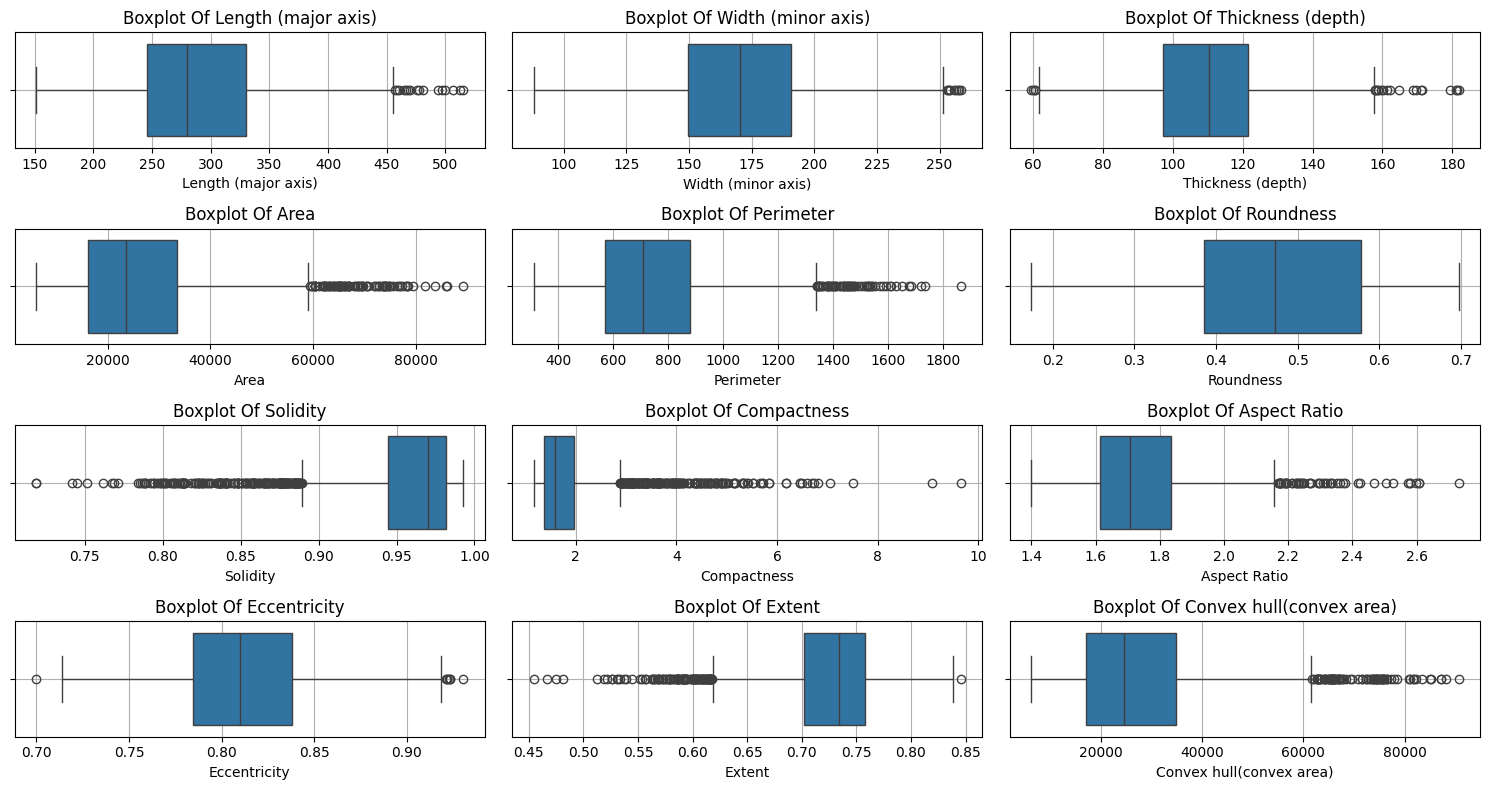

In [15]:
# visualise outliers
def visualise_outliers(df):
  if 'Type' in df.columns:
    features = df.drop(columns=['Type'])
  else:
    features = df

  # Number of features
  num_features = len(features.columns)

  # Determine grid size for subplots
  n_rows = (num_features + 2) // 3

  # Create a figure and a grid of subplots
  fig, axes = plt.subplots(n_rows, 3, figsize=(15, 8))
  axes = axes.flatten()

  # Plot each feature in a subplot
  for i, col in enumerate(features.columns):
      sns.boxplot(data=features, x=col, ax=axes[i])
      initial_col = col

      axes[i].set_title(f'Boxplot Of {col}')
      axes[i].grid()

  # Remove any empty subplots
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  # Adjust layout
  plt.tight_layout()
  plt.show()

visualise_outliers(df)

The data seems to contain a lot of outliers. For the normally/near-normally distributed features we will make use of z-scores to identify the outliers in those features and impute them with the mean value of that feature. As for the other features that have skewed distributions, we will identify outliers using Interquartile Range (IQR). These outliers will be imputed using the feature's median value.

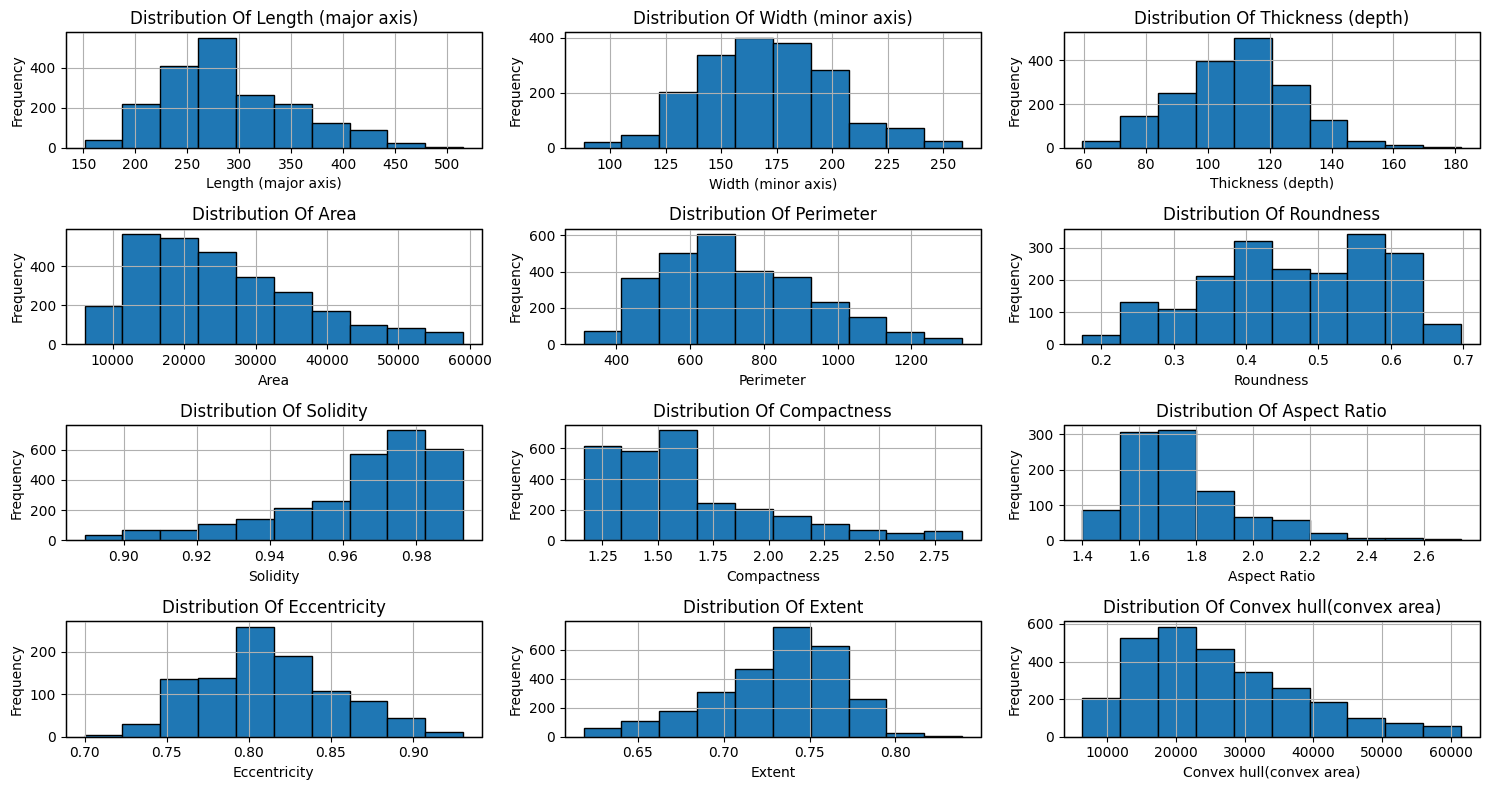

In [16]:
# Calculate Z-scores for each column
normally_columns = ['Width (minor axis)', 'Thickness (depth)', 'Roundness', 'Eccentricity']
skewed_columns = df.columns[~df.columns.isin(normally_columns) & ~df.columns.isin(['Type'])]
z_scores = zscore(df[normally_columns])

# Calculate absolute Z-scores
abs_z_scores = np.abs(z_scores)
threshold = 3

# Identify outliers
z_outliers = (abs_z_scores > threshold).any(axis=1)

# Impute outliers with mean (these follow normal/near-normal distribution)
df.loc[z_outliers, normally_columns] = df.loc[~z_outliers, normally_columns].mean()

# Calculate IQR for skew distributions
for col in skewed_columns:
  # Identify outliers
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr_value = iqr(df[col])
  lower_bound = q1 - 1.5 * iqr_value
  upper_bound = q3 + 1.5 * iqr_value

  # Impute outliers
  df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median()

visualise_distributions(df)

## Handle missing values

**Choice on using KNN-imputation over mean/median:**

At first the choice was made to impute missing values using mean/median imputation for the features `'Width (minor axis)'`, `'Length (major axis)'`, and `'Thickness (depth)'`. However, this resulted in the distributions of the updated features to introduce bias where the mean or median values formed the majority. To prevent this, the imputation strategy changed from using either mean or median imputation, to using a K-Nearest-Neighbour approach. This approach imputed the missing values using the `5` nearest neighbouring data points of a missing value in each feature, respectively. This approached has shown to be a better choice as the distributions now show unbiased values. This is only with respect to the three mentioned features.

In [17]:
# using KNN for imputations
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Convert df to array-like shape
columns_to_impute = ['Width (minor axis)', 'Length (major axis)', 'Thickness (depth)']

df_as_array = df[columns_to_impute].values

# Impute missing values
df_imputed = imputer.fit_transform(df_as_array)

df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

df.update(df_imputed)

df.isnull().sum()

,0
Length (major axis),0
Width (minor axis),0
Thickness (depth),0
Area,0
Perimeter,0
Roundness,857
Solidity,0
Compactness,0
Aspect Ratio,1799
Eccentricity,1799


Notice that I did not replace the missing values for `Roundness`, `Eccentricity` or `Aspect Ratio`, even though I could have done the same as with the other features. The reason I choose not to replace them, is because these values are dependent on either/both `Length (major axis)` and `Width (minor axis)`. Therefore, I can make use of their respective formulas to calculate each missing value more accurate, instead of just using the mean or median imputations.

Missing values:
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64



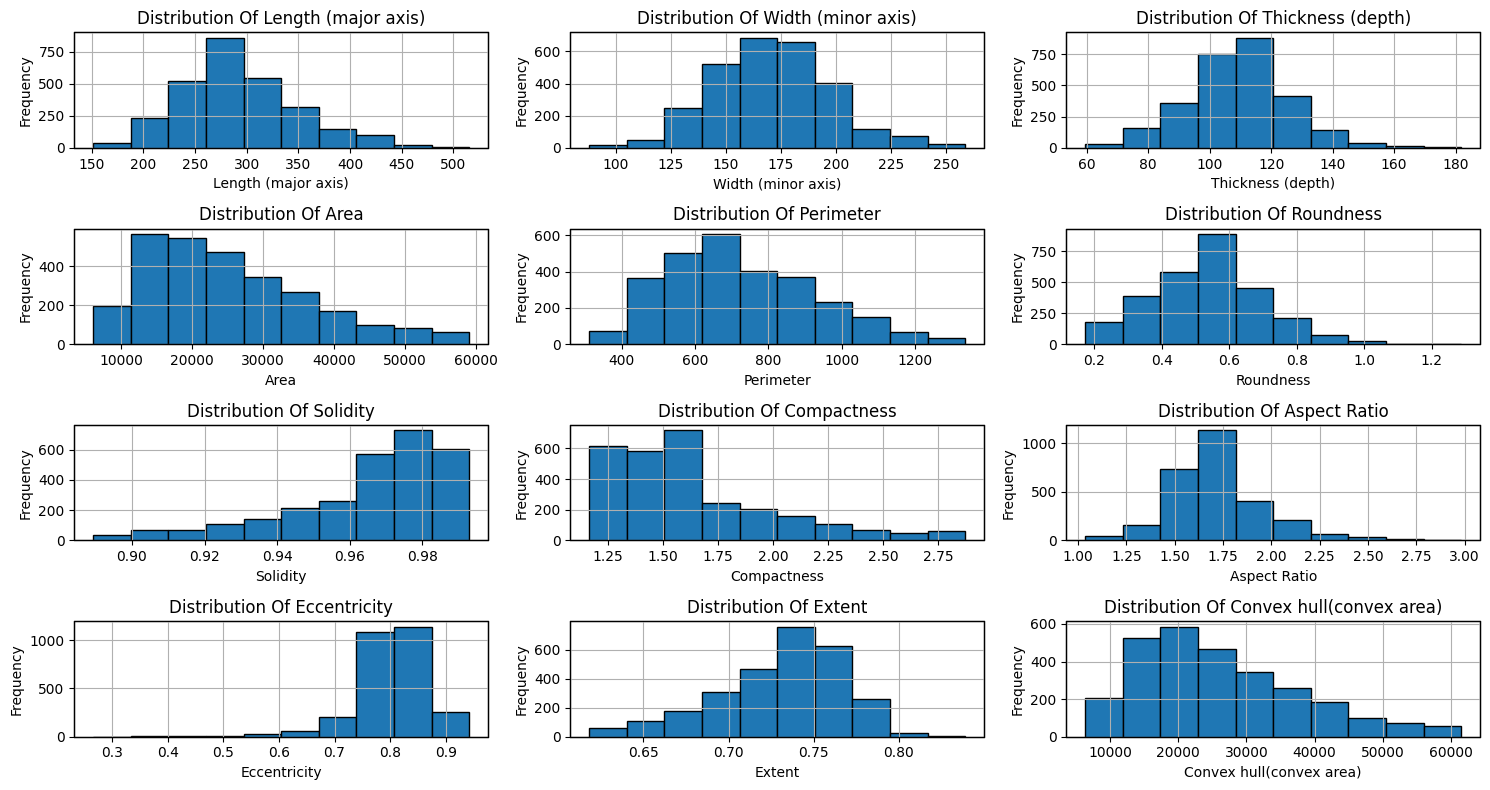

In [18]:
cleaned_df = df.copy()

cleaned_df['Eccentricity'] = cleaned_df['Eccentricity'].fillna(np.sqrt(1 - (cleaned_df['Width (minor axis)'] / cleaned_df['Length (major axis)']) ** 2))
cleaned_df['Aspect Ratio'] = cleaned_df['Aspect Ratio'].fillna(cleaned_df['Length (major axis)'] / cleaned_df['Width (minor axis)'])

# 'Roundess' makes use of the 'Area' and 'Length' and we've already handled 'Length'
# Thus we can make use of the formula to calculate 'Roundess'
cleaned_df['Roundness'] = cleaned_df['Roundness'].fillna((4 * np.pi * cleaned_df['Area']) / (np.pi * cleaned_df['Length (major axis)'] ** 2))

# Check if there are any missing values left
print(f'Missing values:\n{cleaned_df.isnull().sum()}\n')
visualise_distributions(cleaned_df)

## Standardising the data

- **Robust scaling:** We use the RobustScaler to scale the numerical features. Since there seems to be some existens of outliers (after handling missing values), the outliers might introduce some bias to the classification model. Min-max scaling is also deemed to sensitive to outliers and may lose important information when scaling to a range of `[0,1]`. As for standard scaling, it is also sensitive to outliers and assumes the data has a normal distribution, which is not the case here. Hence, robust scaling is used.

In [19]:
# Using robust scaling for numerical features
scaler = RobustScaler()
scaled_features = scaler.fit_transform(cleaned_df.drop(columns=['Type']))
scaled_features = pd.DataFrame(scaled_features, columns=cleaned_df.columns[:-1])

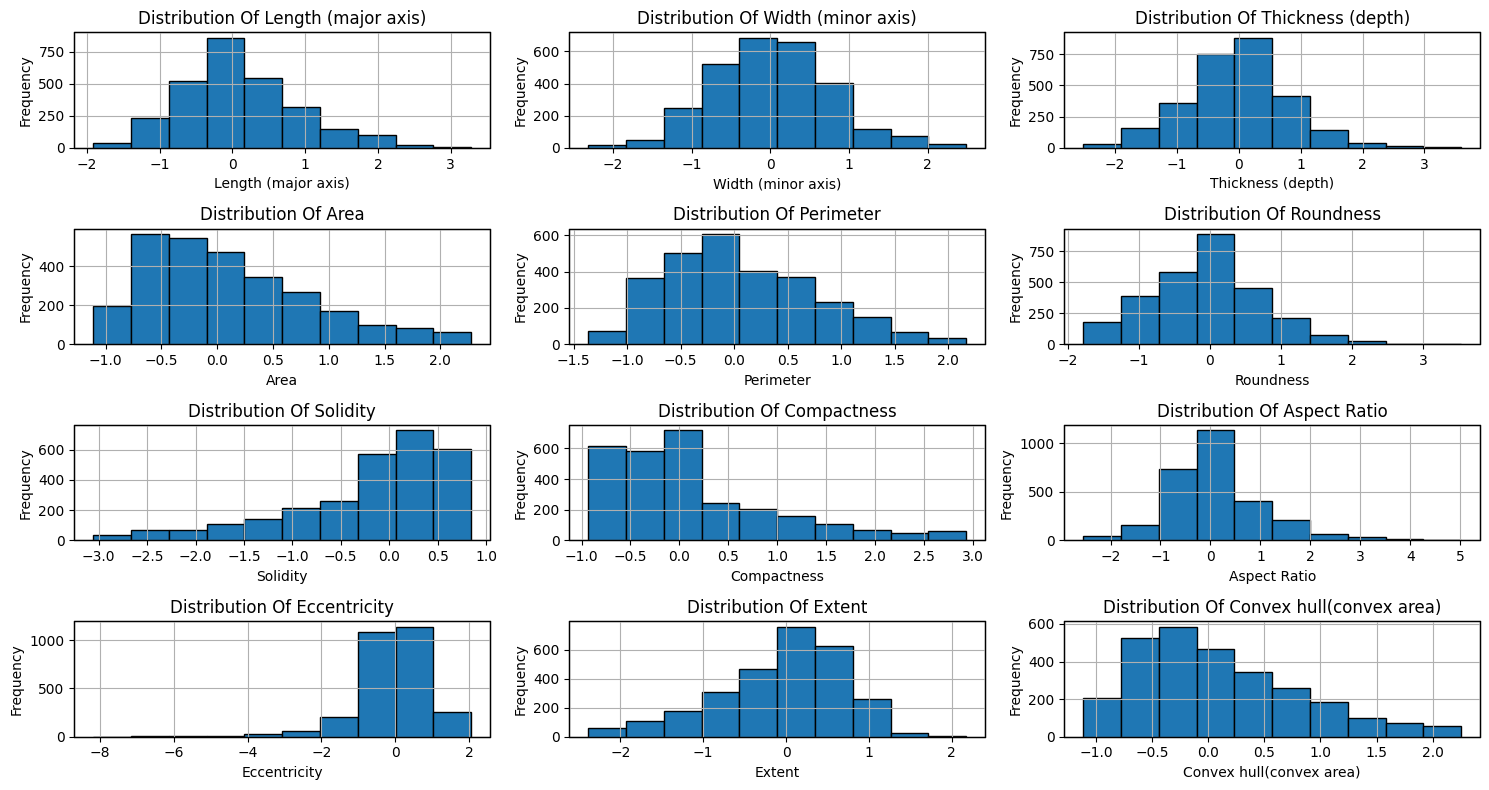

In [20]:
# Visualise new distributions
visualise_distributions(scaled_features)

In [21]:
scaled_features.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,0.101262,0.015262,-0.021232,0.105486,0.067297,-0.042518,-0.199514,0.143627,0.109749,-0.124744,-0.065574,0.099011
std,0.806771,0.755237,0.832826,0.729179,0.695448,0.766593,0.835955,0.833666,0.950192,1.038534,0.765260,0.718787
min,-1.912603,-2.312434,-2.511597,-1.111406,-1.361958,-1.781110,-3.055579,-0.931139,-2.545288,-8.171811,-2.388058,-1.113051
25%,-0.432754,-0.503782,-0.530124,-0.461651,-0.466998,-0.607139,-0.583286,-0.495050,-0.477710,-0.544753,-0.507646,-0.457850
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.567246,0.496218,0.469876,0.538349,0.533002,0.392861,0.416714,0.504950,0.522290,0.455247,0.492354,0.542150
max,3.280573,2.488363,3.592232,2.275465,2.166441,3.535261,0.846361,2.933197,5.017085,2.047656,2.174497,2.253296


## Encoding the data


In [22]:
# Using indices to encode types
encoder = cleaned_df.copy()
encoder['Type'] = encoder['Type'].astype('category')
encoder['Type'] = encoder['Type'].cat.codes
encoder = encoder.drop(columns=encoder.columns[:-1])

## Shuffling the data
Shuffling with Scikit-learn.

In [23]:
combined_cleaned_df = pd.concat([pd.DataFrame(scaled_features), encoder], axis=1)
print(combined_cleaned_df.head())

# Combine the data
X = combined_cleaned_df.iloc[:, :-1]
y = combined_cleaned_df.iloc[:, -1:]

# Shuffle
X, y = shuffle(X, y, random_state=99)

   Length (major axis)  Width (minor axis)  Thickness (depth)      Area  \
0             0.092051            1.626030           0.893992 -0.052462   
1             0.581326            1.801922           0.915962 -0.025704   
2             1.185487            1.667641           0.796083 -0.067310   
3             1.230732            1.761803           0.802182 -0.055048   
4             0.540405            1.688253          -0.128993 -0.279232   

   Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0  -0.219036   2.461516  0.111557    -0.267054     -1.600097     -2.752272   
1  -0.091167   1.526088 -0.494181     0.057485     -1.163383     -1.671808   
2  -0.208269   0.538230 -0.118743    -0.200360     -0.332863     -0.363553   
3  -0.159132   0.511267 -0.184972    -0.080091     -0.369632     -0.408093   
4  -0.284293   0.874233 -0.714728     0.119760     -1.116839     -1.577245   

     Extent  Convex hull(convex area)  Type  
0 -1.086752                 -0.082

## Splitting the data

**Splitting Process:**

- **First Split:** Split the data into a Training Set (60%) and a Temporary Set (40%).

- **Second Split:** Separate the Temporary Set into a Validation Set (20% original data) and a Test Set (20% original data). This method ensures that the model's performance is evaluated without bias and not influenced by the data used for training or validation.

In [24]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=99)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=99)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 1681 samples
Validation set: 561 samples
Test set: 561 samples


# Class definition

In [25]:
class AlmondNeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size, num_hidden_layers=2, activation_function='relu'):
    super(AlmondNeuralNetwork, self).__init__()
    self.input_size = input_size
    self.hidden_sizes = hidden_sizes
    self.output_size = output_size
    self.num_hidden_layers = num_hidden_layers
    self.activation_function = activation_function

    # Initialise hidden layers' activation function
    if activation_function == 'relu':
      self.activation = nn.ReLU()
    elif activation_function == 'sigmoid':
      self.activation = nn.Sigmoid()
    else:
      raise ValueError("Activation function should only be 'relu' or 'sigmoid'")

    # Define NN architecture using the number of hidden layers
    network_layers = []
    network_layers.append(nn.Linear(input_size, hidden_sizes[0]))
    network_layers.append(self.activation)

    for i in range(1, num_hidden_layers):
      network_layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
      network_layers.append(self.activation)

    self.hidden_layers = nn.ModuleList(network_layers)
    self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    # Construct network from architecure
    self.model = nn.Sequential(*self.hidden_layers, self.output_layer)

    # Initialise weights
    for layer in self.hidden_layers:
      if isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)
        nn.init.zeros_(layer.bias)
    nn.init.xavier_uniform_(self.output_layer.weight)
    nn.init.zeros_(self.output_layer.bias)

  def forward(self, x):
    return self.model(x)

  def get_loss_function(self):
    return nn.CrossEntropyLoss()

  def get_optimiser(self, optimiser_alg, learning_rate):
    if optimiser_alg == 'rprop':
      optimiser = optim.Rprop(self.parameters(), lr=learning_rate)
    elif optimiser_alg == 'sgd':
      optimiser = optim.SGD(self.parameters(), lr=learning_rate)
    else:
      raise ValueError("Optimiser should only be 'rprop' or 'sgd'")
    return optimiser

# Helper Functions

### Initialise Hyperparameters

In [26]:
def initialise_hyperparameters(seed, num_hidden_layers):
  np.random.seed(seed)
  torch.manual_seed(seed)

  num_epochs = np.random.randint(100, 500)

  # Num neurons should decrease from hidden layer to next
  if num_hidden_layers == 2:
    hidden_sizes = [64, 32]
  elif num_hidden_layers == 3:
    hidden_sizes = [128, 64, 32]
  elif num_hidden_layers == 4:
    hidden_sizes = [256, 128, 64, 32]
  else:
    hidden_sizes = [512, 256, 128, 64, 32]

  activation_function = np.random.choice(['relu', 'sigmoid'])

  return num_epochs, hidden_sizes, activation_function

### Create model

In [27]:
def create_model(seed, input_size, output_size, num_hidden_layers, learning_rate, optimiser_alg='rprop'):
  torch.manual_seed(seed)
  np.random.seed(seed)

  # Randomly choose hyperparameters
  num_epochs, hidden_sizes, activation_function = initialise_hyperparameters(seed, num_hidden_layers)

  print('================================================')
  print('============== HYPERPARAMETERS ===============')
  print('================================================')
  print(f"Seed: {seed}")
  print(f"Number of epochs: {num_epochs}")
  print(f"Number of hidden layers: {num_hidden_layers}")
  print(f"Hidden neurons [layer-by-layer]: {hidden_sizes}")
  print(f"Activation function: {activation_function}")
  print(f"Loss function: Cross-Entropy")
  print(f"Optimiser: {optimiser_alg}")
  print(f"Learning rate: {learning_rate}")
  print('\n')

  model_nn = AlmondNeuralNetwork(input_size, hidden_sizes, output_size, num_hidden_layers, activation_function)

  # Get loss function
  loss_function = model_nn.get_loss_function()

  # Get optimiser
  optimiser = model_nn.get_optimiser(optimiser_alg, learning_rate)

  return num_epochs, model_nn, optimiser, loss_function

### Handle class label data

In [28]:
def handle_class_label_data(y_train, y_val):
  y_train = torch.tensor(y_train.values, dtype=torch.long).flatten()
  y_val = torch.tensor(y_val.values, dtype=torch.long).flatten()

  return y_train, y_val

### Calculate accuracy

In [29]:
def calculate_correct_preds(y_true, y_pred):
  _, predicted = torch.max(y_pred, dim=1)
  correct = (predicted == y_true).sum().item()
  return correct

### Plot heatmap

In [30]:
def plot_heatmap(hidden_layers, learning_rates, comparison_results):
  plt.figure(figsize=(10, 6))
  sns.heatmap(comparison_results, annot=True, fmt=".2f", cmap="Reds", xticklabels=learning_rates, yticklabels=hidden_layers)
  plt.xlabel('Learning Rate')
  plt.ylabel('Number of Hidden Layers')
  plt.title('Comparison of Hyperparameters')
  plt.show()

### Grid search for best model

In [31]:
def grid_search(comparison_results, hidden_layers, learning_rates):
  best_index = np.unravel_index(np.argmax(comparison_results), comparison_results.shape)
  best_hidden_layers = list(hidden_layers)[best_index[0]]
  best_learning_rate = list(learning_rates)[best_index[1]]

  return best_hidden_layers, best_learning_rate

### Train model

In [32]:
def train_model(seed, num_epochs, model, optimiser, loss_function, X_train, y_train, X_val, y_val, fold_counter, folds, optimiser_alg):
  np.random.seed(seed)
  torch.manual_seed(seed)

  # Variables
  total_loss = 0
  total_val_loss = 0
  best_training_accuracy = 0
  best_validation_accuracy = 0
  best_model = None
  termination_counter = 1

  # Convert data to tensors
  X_train = torch.tensor(X_train.values, dtype=torch.float32)
  X_val = torch.tensor(X_val.values, dtype=torch.float32)

  # Handle class labels
  y_train, y_val = handle_class_label_data(y_train, y_val)

  # Create DataLoader for mini-batching
  batch_size = 32 if optimiser_alg == 'rprop' else 1
  train_set = TensorDataset(X_train, y_train)
  train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

  # Training loop
  start_time = time.time()
  model.train()
  for epoch in range(num_epochs):
    curr_epoch_loss = 0
    num_correct_train_predictions = 0
    total_train_samples = 0

    # Iterate over mini-batches
    for X_batch, y_batch in train_loader:
      # Forward pass
      outputs = model(X_batch)
      loss = loss_function(outputs, y_batch)
      curr_epoch_loss += loss.item()

      # Backward pass and optimisation
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

      # Calculate training accuracy for this batch
      num_correct_train_predictions += calculate_correct_preds(y_batch, outputs)
      total_train_samples += len(y_batch)

    # Calculate average training accuracy for this epoch
    training_accuracy = num_correct_train_predictions / len(X_train)
    total_loss += curr_epoch_loss

    if training_accuracy > best_training_accuracy:
      best_training_accuracy = training_accuracy
      best_model = copy.deepcopy(model)
      termination_counter = 1
    else:
      termination_counter += 1

    # Print current epoch performance
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {training_accuracy:.4f}")

    if termination_counter > 10:
      print(f"Early stopping triggered at epoch {epoch+1}")
      break

  # Validation phase
  model.eval()
  num_correct_val_predictions = 0
  total_val_samples = 0
  with torch.no_grad():
    val_outputs = model(X_val)
    val_loss = loss_function(val_outputs, y_val)
    total_val_loss += val_loss.item()

    # Calculate validation accuracy
    num_correct_val_predictions += calculate_correct_preds(y_val, val_outputs)
    total_val_samples += len(y_val)

  validation_accuracy = num_correct_val_predictions / len(X_val)

  total_time = time.time() - start_time
  print(f"\nDetails for K-fold {fold_counter}/{folds}") if fold_counter is not None else None
  print(f"\nTraining process completed in {total_time:.2f} seconds")
  print('-----------------------------------------------------------')
  print(f"- Average Training Loss: {total_loss / num_epochs:.4f}")
  print(f"- Best Training Accuracy: {best_training_accuracy:.4f}")
  print(f"- Validation Loss: {total_val_loss:.4f}")
  print(f"- Validation Accuracy: {validation_accuracy:.4f}")
  print('-----------------------------------------------------------\n')

  return validation_accuracy, total_val_loss, best_model

In [33]:
# def train_model(seed, num_epochs, model, optimiser, loss_function, X_train, y_train, X_val, y_val, fold_counter, folds, optmiser_alg):
#   np.random.seed(seed)
#   torch.manual_seed(seed)

#   # Variables
#   total_loss = 0
#   total_val_loss = 0
#   best_training_accuracy = 0
#   best_validation_accuracy = 0
#   best_model = None
#   termination_counter = 1

#   # Convert data to tensors
#   X_train = torch.tensor(X_train.values, dtype=torch.float32)
#   X_val = torch.tensor(X_val.values, dtype=torch.float32)

#   # Handle class labels
#   y_train, y_val = handle_class_label_data(y_train, y_val)

#   # Training loop
#   start_time = time.time()
#   for epoch in range(num_epochs):
#     model.train()

#     # Forward pass
#     outputs = model(X_train)
#     loss = loss_function(outputs, y_train)
#     total_loss += loss.item()

#     # Backward pass with optimisation
#     optimiser.zero_grad()
#     loss.backward()
#     optimiser.step()

#     # Calculate training accuracy
#     training_accuracy = calculate_correct_preds(y_train, outputs) / len(y_train)
#     if training_accuracy > best_training_accuracy:
#       best_training_accuracy = training_accuracy

#     # Validation phase
#     model.eval()
#     with torch.no_grad():
#       val_outputs = model(X_val)
#       val_loss = loss_function(val_outputs, y_val)
#       total_val_loss += val_loss.item()

#       # Calculate validation accuracy
#       validation_accuracy = calculate_correct_preds(y_val, val_outputs) / len(y_val)
#       if validation_accuracy > best_validation_accuracy:
#         best_validation_accuracy = validation_accuracy
#         best_model = copy.deepcopy(model)
#         termination_counter = 1
#       else:
#         termination_counter += 1


#       # Print current epoch performance
#       print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

#       if termination_counter > 10:
#         print(f"Early stopping triggered at epoch {epoch+1}")
#         break

#   total_time = time.time() - start_time
#   print(f"Details for K-fold {fold_counter}/{folds}")
#   print(f"\nTraining process completed in {total_time:.2f} seconds")
#   print('-----------------------------------------------------------')
#   print(f"- Average Training Loss: {total_loss / num_epochs:.4f}")
#   print(f"- Average Validation Loss: {total_val_loss / num_epochs:.4f}")
#   print(f"- Best Training Accuracy: {best_training_accuracy:.4f}")
#   print(f"- Best Validation Accuracy: {best_validation_accuracy:.4f}")
#   print('-----------------------------------------------------------\n')

#   return best_validation_accuracy, total_val_loss, best_model

### Test model

In [34]:
def test_model(seed, model, loss_function, X_test, y_test):
  np.random.seed(seed)
  torch.manual_seed(seed)

  # Variables
  testing_loss = 0
  testing_accuracy = 0

  # Convert data to tensors
  X_test = torch.tensor(X_test.values, dtype=torch.float32)

  # Handle class labels
  y_test = handle_class_label_data(y_test, y_test)

  # Testing phase
  model.eval()
  with torch.no_grad():
    testing_outputs = model(X_test)
    testing_loss = loss_function(testing_outputs, y_test)
    testing_accuracy = calculate_correct_preds(y_test, testing_outputs)

  print('\n-----------------------------------------------------------')
  print(f"Test Loss: {testing_loss.item():.4f}")
  print(f"Test Accuracy: {testing_accuracy/len(y_test):.4f}")
  print('-----------------------------------------------------------\n')

  return testing_accuracy, testing_loss

# Main

In [36]:
seed = 99
np.random.seed(seed)
torch.manual_seed(seed)

def main(seed, optimiser_alg):
  # Fixed parameters
  input_size = 12
  output_size = 3 # based on the number of encoded types

  # Hyperparameters used for comparison
  hidden_layers = set()
  while len(hidden_layers) < 4:
    hidden_layers.add(np.random.randint(2, 6))

  learning_rates = set()
  while len(learning_rates) < 4:
    learning_rates.add(np.random.choice([0.01, 0.025, 0.05, 0.075, 0.1]))

  # learning_rates = [0.01, 0.01, 0.01, 0.01]

  comparison_results = np.zeros((len(hidden_layers), len(learning_rates)))

  folds = 5
  k_fold = KFold(n_splits=folds, shuffle=True, random_state=seed)

  # Create 10 seeds for the independent runs
  random_seeds = set()
  while len(random_seeds) < 10:
    random_seeds.add(np.random.randint(10000, 99999))

  print('================================================')
  print('============== PROGRAM STARTED =================')
  print('================================================')
  print(f'Optimiser: {optimiser_alg}')
  print('------------------------------------------------')

  all_results = {}
  comparison_results = np.zeros((len(hidden_layers), len(learning_rates)))

  # RUn through combinations
  for i, num_hidden_layers in enumerate(hidden_layers):
    print(f'\n~~~~~~~~~~~~~~~~ HIDDEN LAYER {i}/{len(hidden_layers)} ~~~~~~~~~~~~~~~~')
    all_results[num_hidden_layers] = {}

    for j, learning_rate in enumerate(learning_rates):
      print(f'\n~~~~~~~~~~~~~~~~ LEARNING RATE {j}/{len(learning_rates)} ~~~~~~~~~~~~~~~~\n')
      all_results[num_hidden_layers][learning_rate] = {}
      avg_run_accuracies = []
      avg_run_losses = []

      # Independent runs
      for seed in random_seeds:
        np.random.seed(seed)
        torch.manual_seed(seed)

        accuracies = []
        losses = []

        # Create the model
        num_epochs, model_nn, optimiser, loss_function = create_model(seed, input_size, output_size, num_hidden_layers, learning_rate, optimiser_alg)
        model = model_nn.model

        # Perform training
        fold_counter = 1
        for train_idx, val_idx in k_fold.split(X_train):
          X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
          y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

          best_val_accuracy, total_val_loss, best_model = train_model(seed, num_epochs, model, optimiser, loss_function, X_train_fold, y_train_fold, X_val_fold, y_val_fold, fold_counter, folds, optimiser_alg)
          fold_counter += 1
          accuracies.append(best_val_accuracy)
          losses.append(total_val_loss)

        # Store the average performance for current run
        avg_run_accuracies.append(np.mean(accuracies))
        avg_run_losses.append(np.mean(losses))

        # Store the best accuracy
        best_accuracy = np.max(accuracies)

        # Store the results for each seed
        all_results[num_hidden_layers][learning_rate][seed] = {
          'best_accuracy': best_accuracy,
          'avg_accuracy': np.mean(accuracies),
          'avg_loss': np.mean(losses)
        }

      # Store the average performance for current combination
      comparison_results[i, j] = np.mean(avg_run_accuracies)

  # Visualise heatmap
  plot_heatmap(hidden_layers, learning_rates, comparison_results)

  # Perform grid search for best hyperparameters
  best_hidden_layers, best_learning_rate = grid_search(comparison_results, hidden_layers, learning_rates)

  # Create the final model with the best hyperparameters
  final_num_epochs, final_model_nn, final_optimiser, final_loss_function = create_model(seed, input_size, output_size, best_hidden_layers, best_learning_rate, optimiser_alg)

  # Train the final model
  final_best_accuracy, final_loss, final_model = train_model(seed, final_num_epochs, final_model_nn, final_optimiser, final_loss_function, X_train, y_train, X_val, y_val, None, None, optimiser_alg) # no need to kfold on the best

  print('===============================================================')
  print('============== TRAINING & VALIDATION COMPLETED ================')
  print('===============================================================\n')

  print('Do you want to perform testing? (y/n)')
  answer = input()
  if answer == 'y':
    # Perform testing
    print('\n================================================')
    print('============== TESTING STARTED =================')
    print('================================================')

    # Final testing
    test_accuracy, test_loss = test_model(seed, final_model, loss_function, X_test, y_test)
    print(f"Final Test Accuracy: {test_accuracy:.4f}")
    print(f"Final Test Loss: {test_loss:.4f}")

    print('================================================')
    print('============== TESTING COMPLETED ================')
    print('================================================\n')

  print('================================================')
  print('============== PROGRAM COMPLETED ================')
  print('================================================')
  print('\n')

if __name__ == "__main__":
  main(seed, 'rprop')
  print('\nProgram completed using RPROP optimiser')
  main(seed, 'sgd')
  print('\nProgram completed using SGD optimiser')

============== PROGRAM STARTED =================
Optimiser: rprop
------------------------------------------------

~~~~~~~~~~~~~~~~ HIDDEN LAYER 0/4 ~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~ LEARNING RATE 0/4 ~~~~~~~~~~~~~~~~

============== HYPERPARAMETERS ===============
Seed: 18436
Number of epochs: 132
Number of hidden layers: 2
Hidden neurons [layer-by-layer]: [64, 32]
Activation function: relu
Loss function: Cross-Entropy
Optimiser: rprop
Learning rate: 0.1


Epoch [1/132], Loss: 0.9073, Training Accuracy: 0.5454
Epoch [2/132], Loss: 0.6442, Training Accuracy: 0.6540
Epoch [3/132], Loss: 0.5720, Training Accuracy: 0.6615
Epoch [4/132], Loss: 0.7948, Training Accuracy: 0.6637
Epoch [5/132], Loss: 0.7188, Training Accuracy: 0.6644
Epoch [6/132], Loss: 0.5163, Training Accuracy: 0.6644
Epoch [7/132], Loss: 0.7081, Training Accuracy: 0.6637
Epoch [8/132], Loss: 0.6404, Training Accuracy: 0.6644
Epoch [9/132], Loss: 0.8867, Training Accuracy: 0.6644
Epoch [10/132], Loss: 0.5823, Training Ac

KeyboardInterrupt: 